In [51]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [52]:
df = pd.read_csv("/Users/mac/Downloads/project-files-music-genre-classification-with-pca/music_dataset_mod.csv")

In [53]:
df.head()


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [54]:
# Résumé des données pour avoir un aperçu des types de données et des valeurs manquantes
display(df.columns)
display(df.info())
display(df.describe())

Index(['Tempo', 'Dynamics Range', 'Vocal Presence', 'Percussion Strength',
       'String Instrument Detection', 'Electronic Element Presence',
       'Rhythm Complexity', 'Drums Influence', 'Distorted Guitar',
       'Metal Frequencies', 'Ambient Sound Influence', 'Instrumental Overlaps',
       'Genre'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

None

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.177891,46.684324,51.741685,54.854619,58.442054,48.813244,54.421479,76.646294,47.462577,47.319735,50.858454,49.328441
std,19.600614,17.809545,29.008872,29.489650,29.650752,33.239190,29.606431,18.867990,32.492813,32.274932,29.419584,29.140840
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396
25%,107.885045,34.252531,26.635663,29.782438,32.240968,22.331010,29.603967,62.916792,11.678634,14.422842,24.832718,23.605648
50%,121.356455,46.390854,52.245242,54.926936,59.366659,49.871999,54.618441,75.739758,52.994852,50.722858,52.400507,50.106840
75%,135.054584,58.481545,76.919814,79.438614,82.872727,75.133776,78.502328,89.973436,75.149865,75.673932,77.304355,75.550700
max,175.982637,104.932942,109.643123,114.949678,119.991892,119.728293,119.699889,140.031079,99.586429,100.000000,99.820903,99.958673


In [55]:
# Calculer la moyenne de chaque caractéristique par genre
genre_means = df.groupby('Genre').mean()[[
    'Tempo', 'Dynamics Range', 'Vocal Presence', 'Percussion Strength',
    'String Instrument Detection', 'Electronic Element Presence',
    'Rhythm Complexity', 'Drums Influence', 'Distorted Guitar',
    'Metal Frequencies', 'Ambient Sound Influence', 'Instrumental Overlaps'
]]

# Afficher les résultats
print("Moyenne des caractéristiques par genre :")
genre_means


Moyenne des caractéristiques par genre :


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
Genre,,,,,,,,,,,,
Classical,120.572978,65.131640,49.301282,49.825549,70.518492,20.086008,49.981679,73.066489,2.437174,4.787215,50.254044,51.503230
Country,116.897285,45.810483,58.193954,51.916331,60.768751,50.795776,49.103591,72.585892,51.568030,50.477139,52.636416,51.968457
Hip-hop,121.691424,44.645370,46.298376,56.507232,51.672312,73.528611,52.470170,75.933897,50.648120,50.586624,49.607719,48.189754
Jazz,117.794714,44.217770,52.127148,50.762810,57.183837,49.693284,73.438542,81.087158,53.238308,52.153133,50.755447,47.992365
Rock,127.698454,35.765274,51.992504,65.386146,52.104365,50.436210,48.099830,79.917675,73.141707,72.051957,52.720280,46.103653


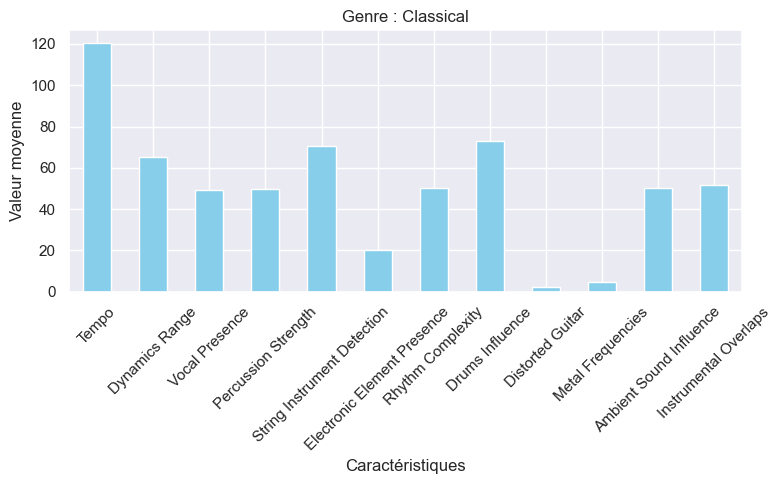

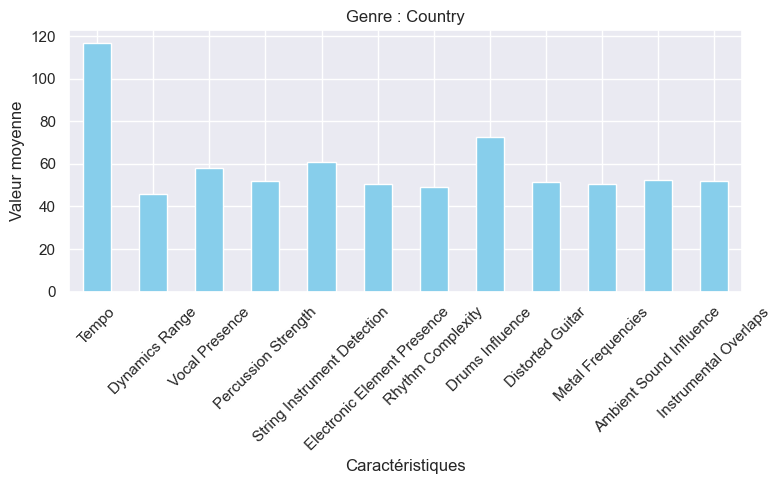

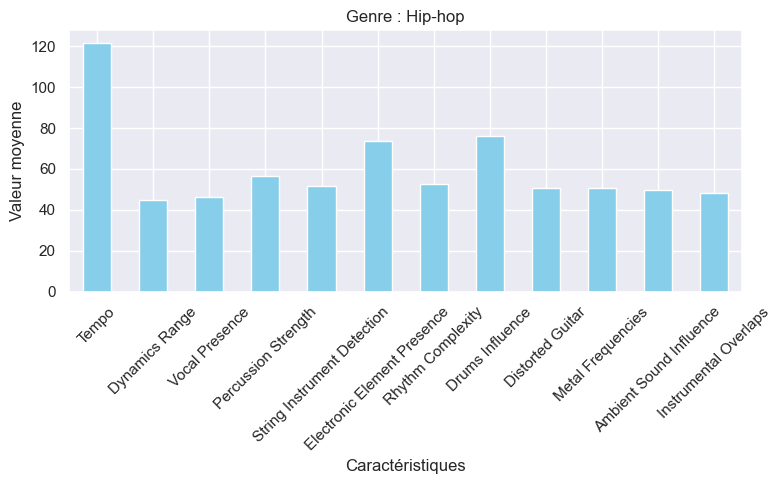

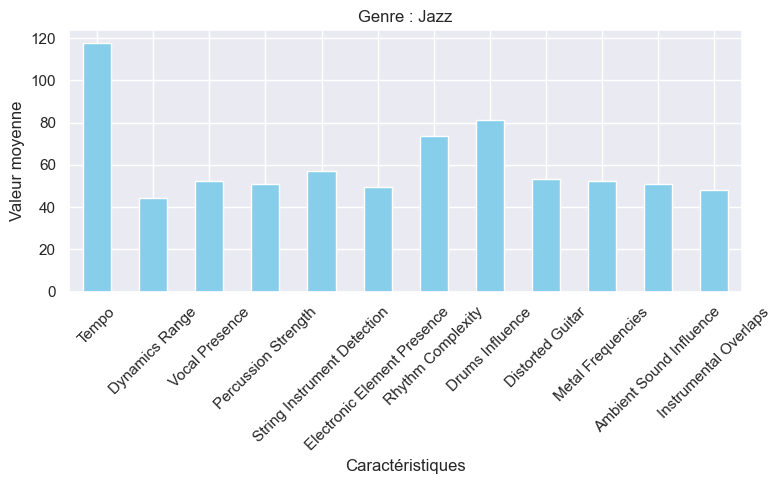

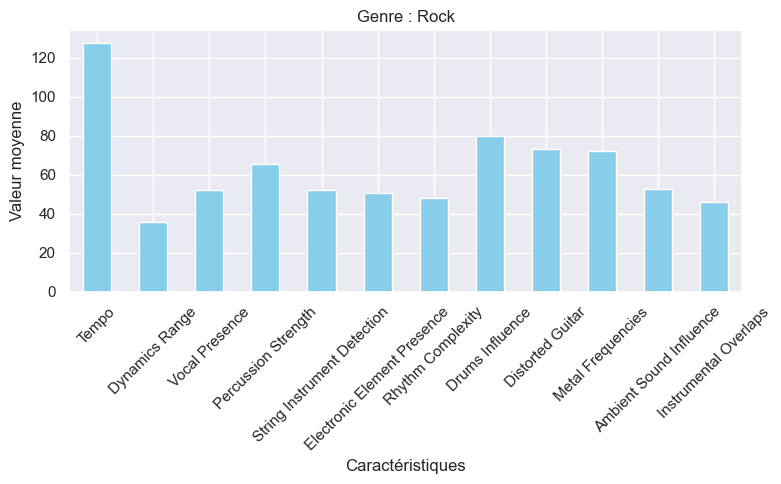

In [56]:
# Calculer la moyenne de chaque caractéristique par genre
genre_means = df.groupby('Genre').mean()[[
    'Tempo', 'Dynamics Range', 'Vocal Presence', 'Percussion Strength',
    'String Instrument Detection', 'Electronic Element Presence',
    'Rhythm Complexity', 'Drums Influence', 'Distorted Guitar',
    'Metal Frequencies', 'Ambient Sound Influence', 'Instrumental Overlaps'
]]

# Créer un graphique pour chaque genre
for genre in genre_means.index:
    plt.figure(figsize=(8, 5))
    genre_means.loc[genre].plot(kind='bar', color='skyblue')
    plt.title(f"Genre : {genre}")
    plt.xlabel("Caractéristiques")
    plt.ylabel("Valeur moyenne")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


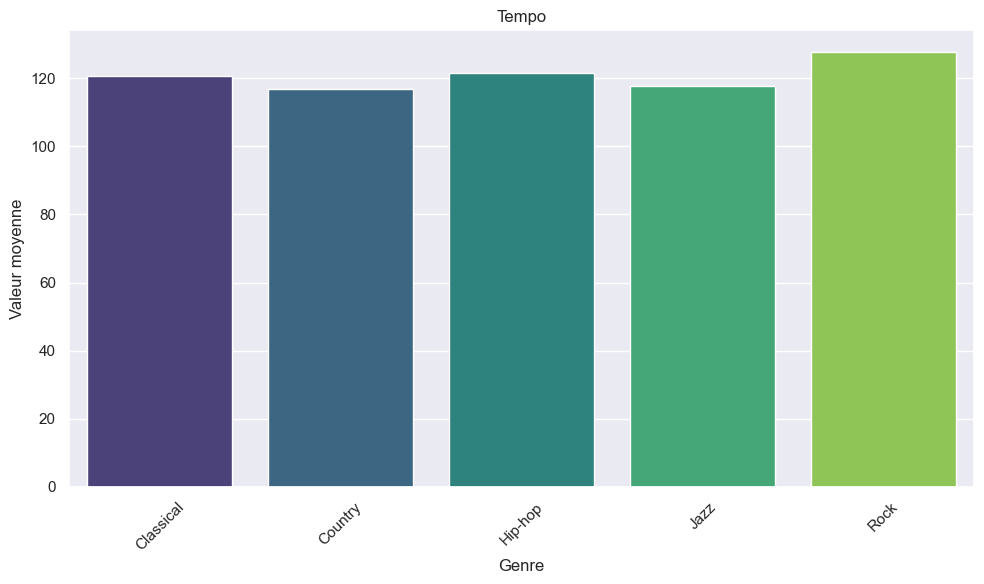

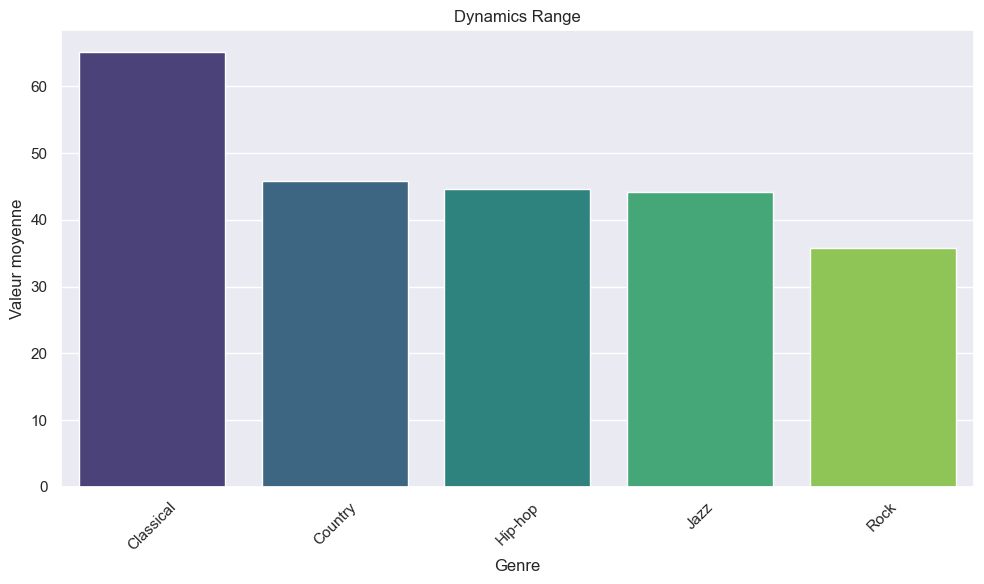

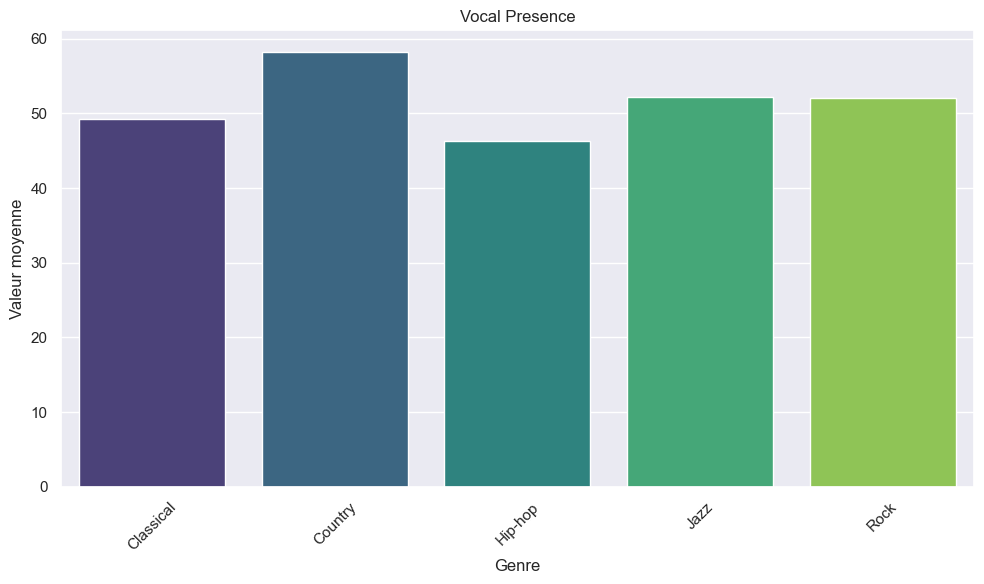

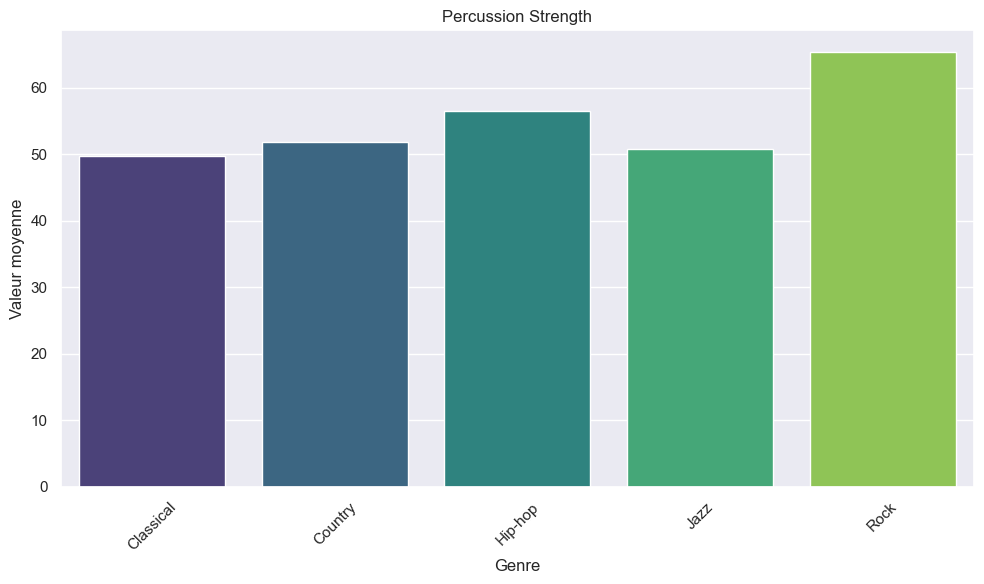

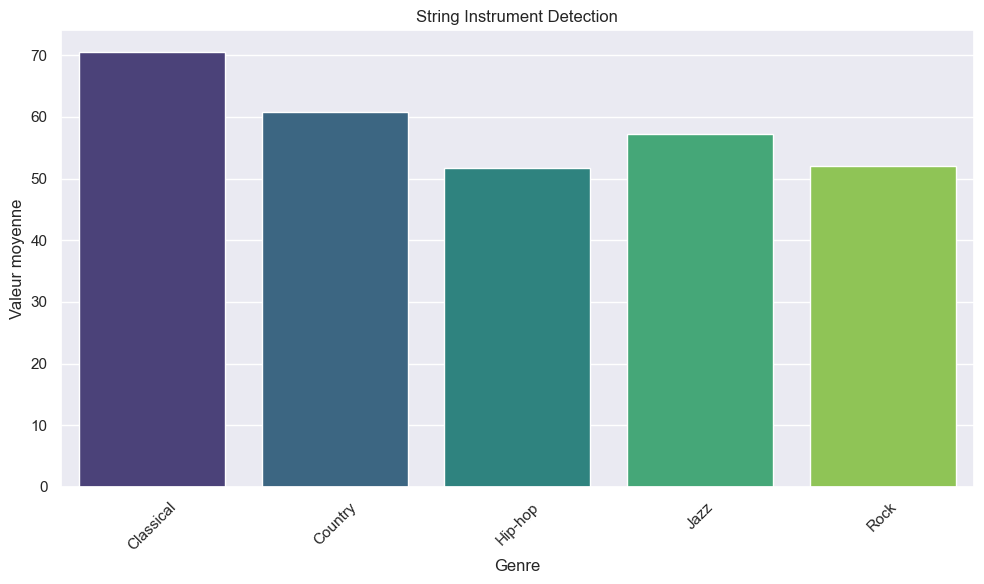

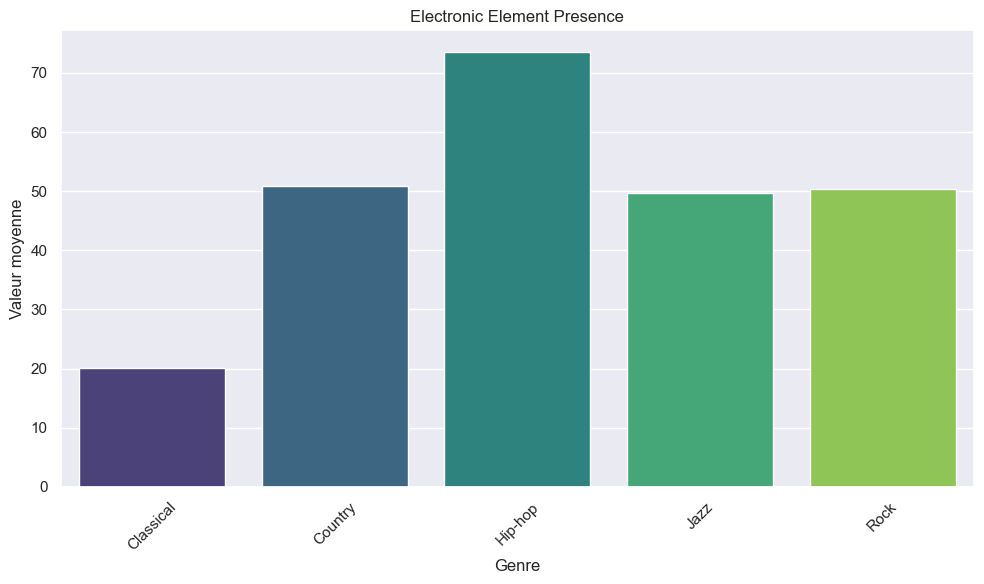

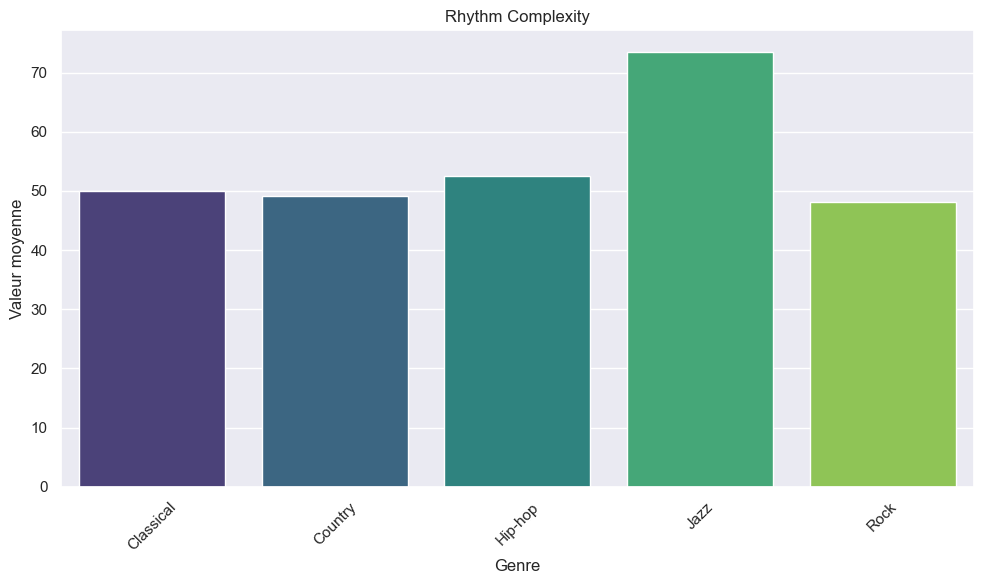

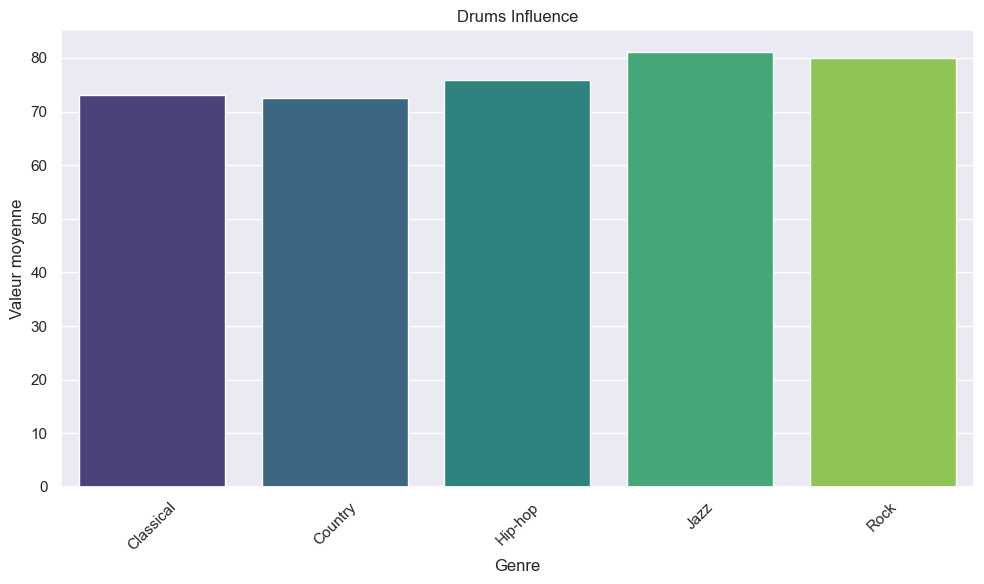

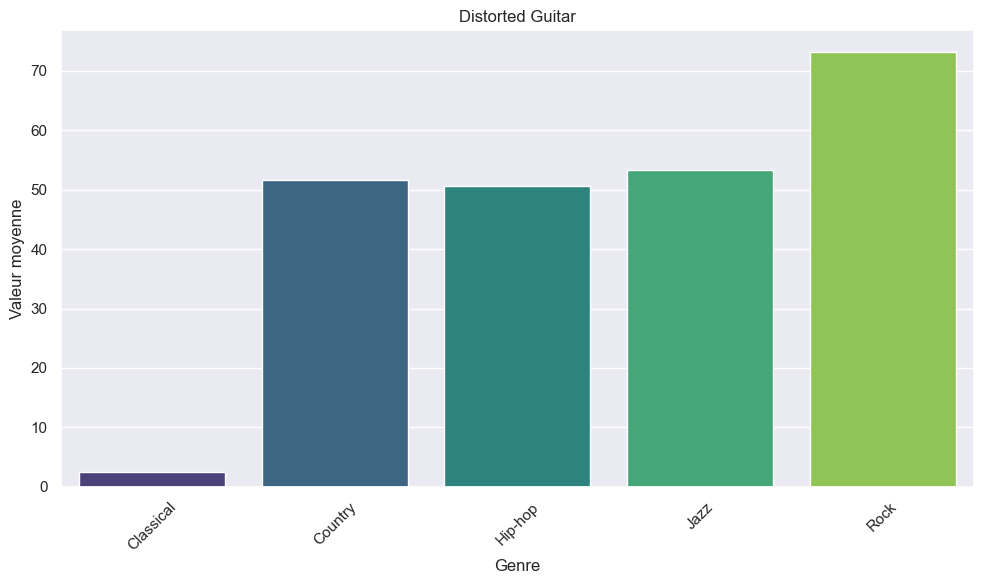

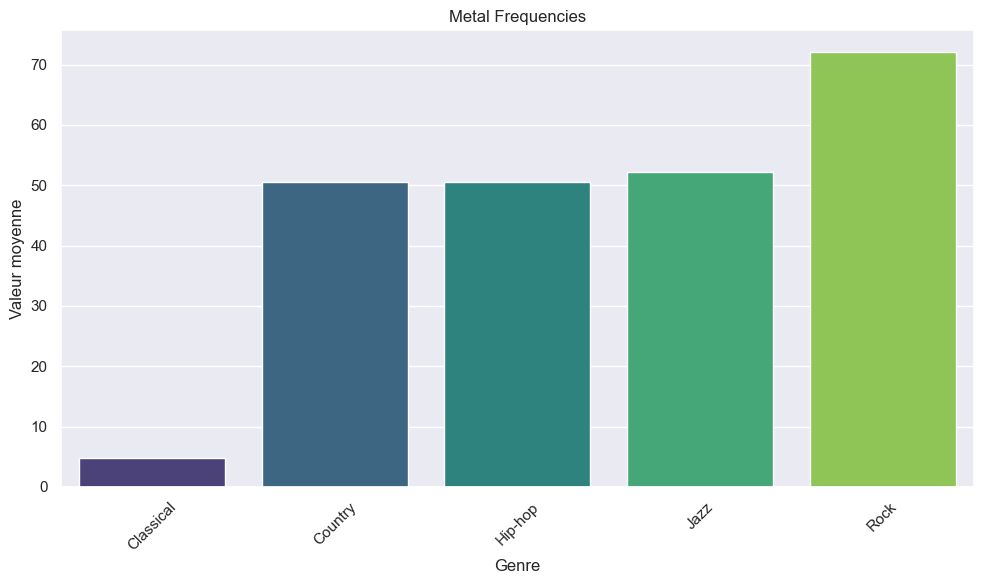

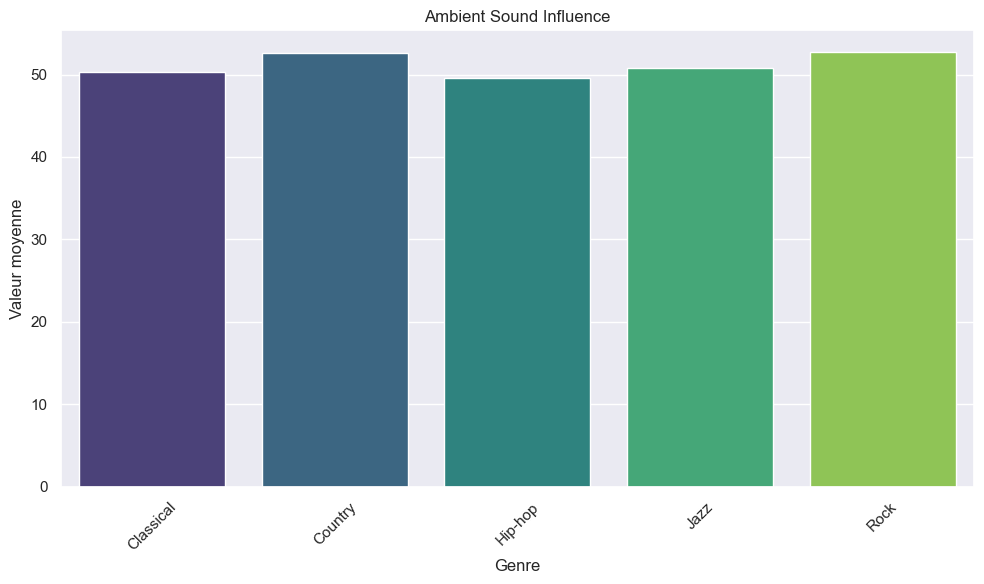

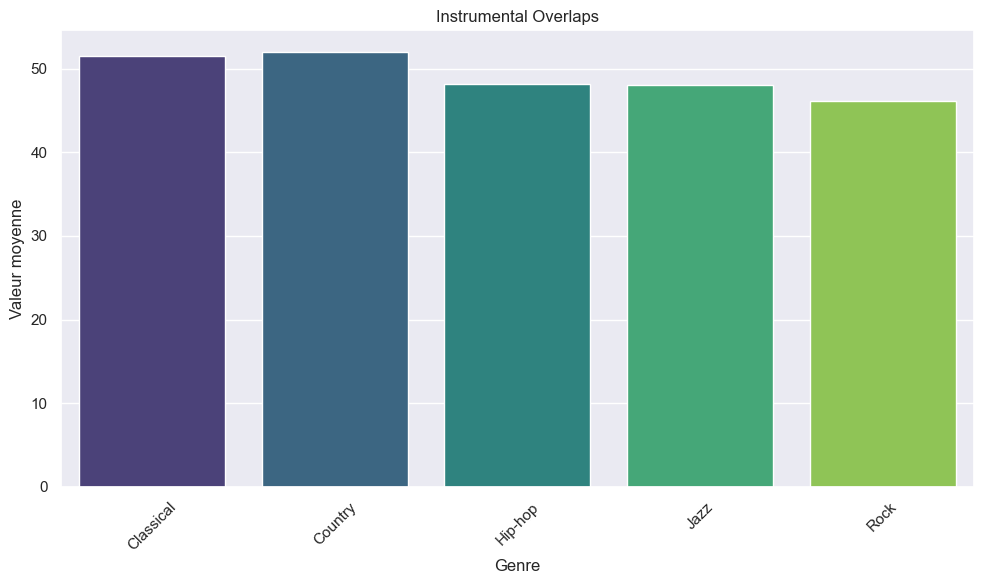

In [57]:
# Liste des caractéristiques pour lesquelles afficher les valeurs moyennes par genre
features = [
    'Tempo', 'Dynamics Range', 'Vocal Presence', 'Percussion Strength',
    'String Instrument Detection', 'Electronic Element Presence',
    'Rhythm Complexity', 'Drums Influence', 'Distorted Guitar',
    'Metal Frequencies', 'Ambient Sound Influence', 'Instrumental Overlaps'
]

# Créer un graphique pour chaque caractéristique, avec les valeurs moyennes pour tous les genres
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')
    plt.title(f"{feature}")
    plt.ylabel("Valeur moyenne")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


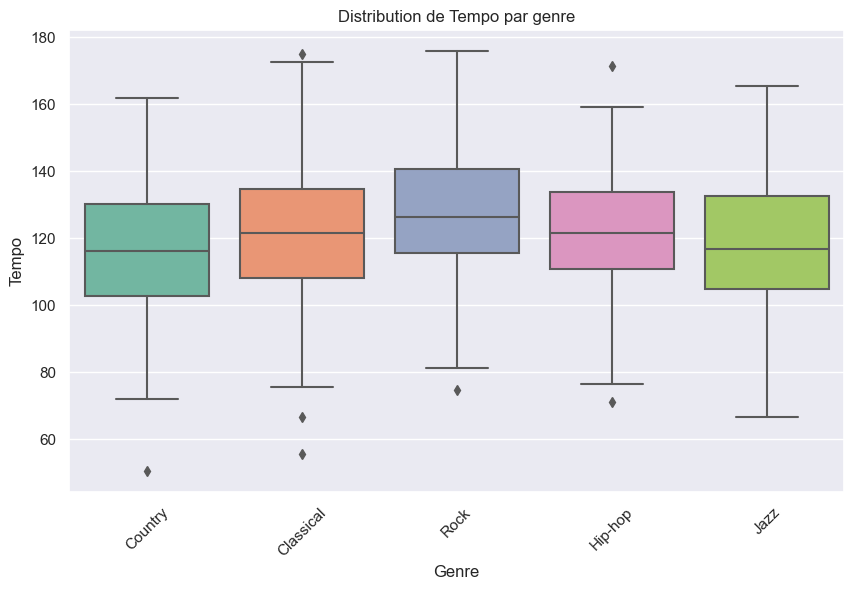

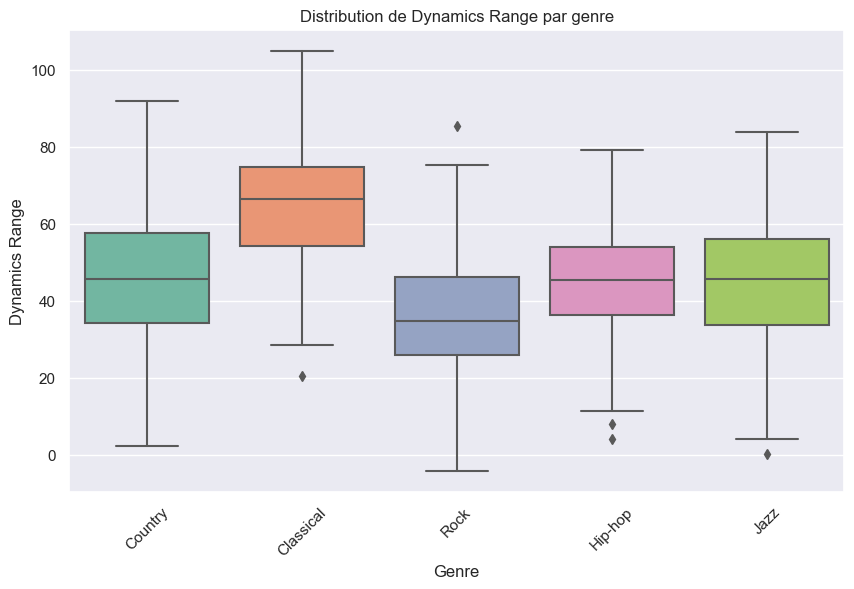

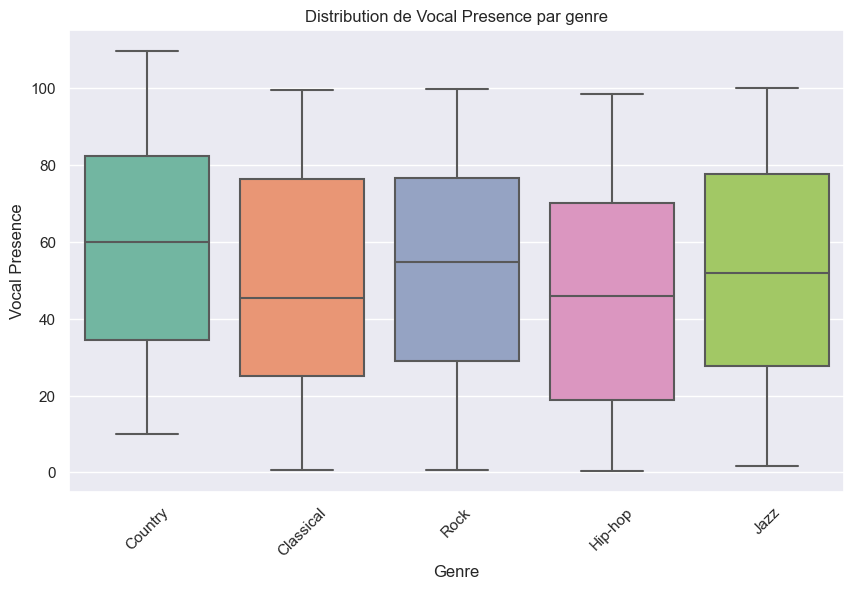

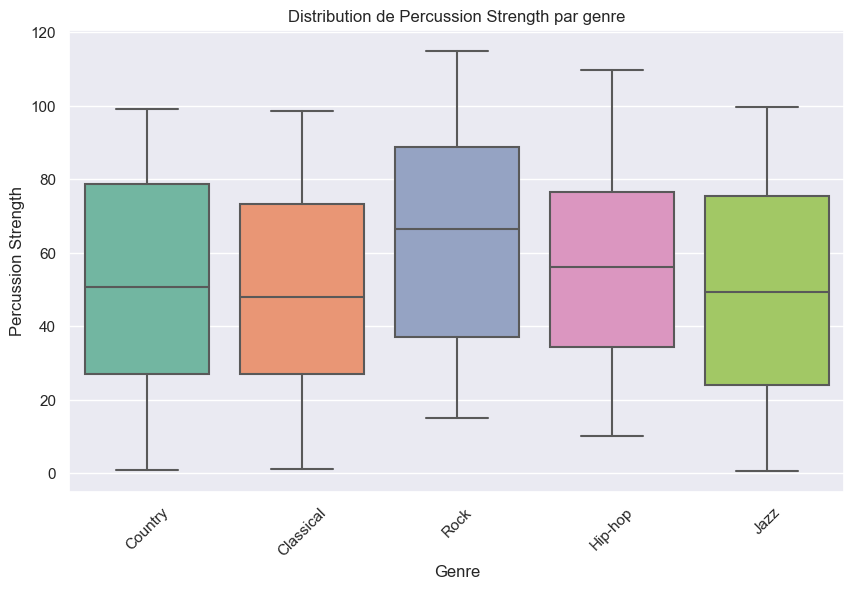

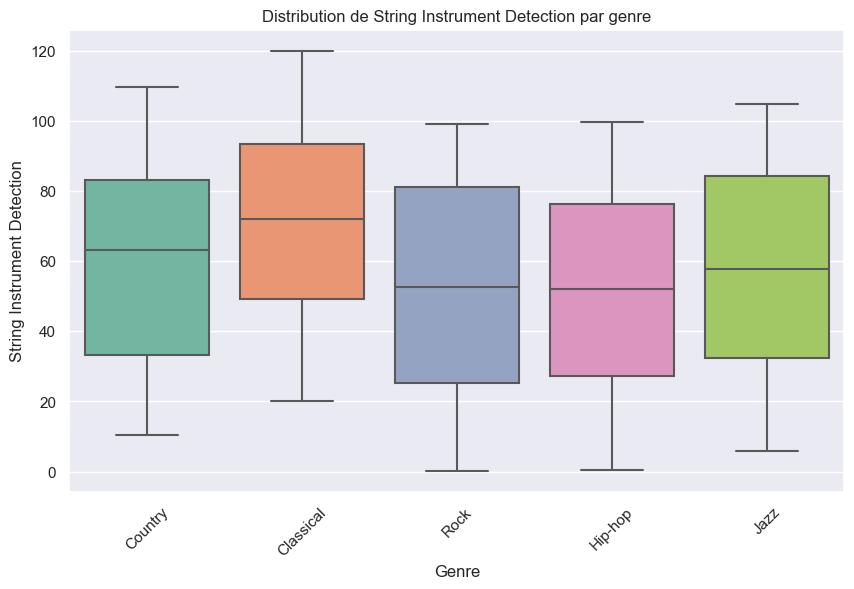

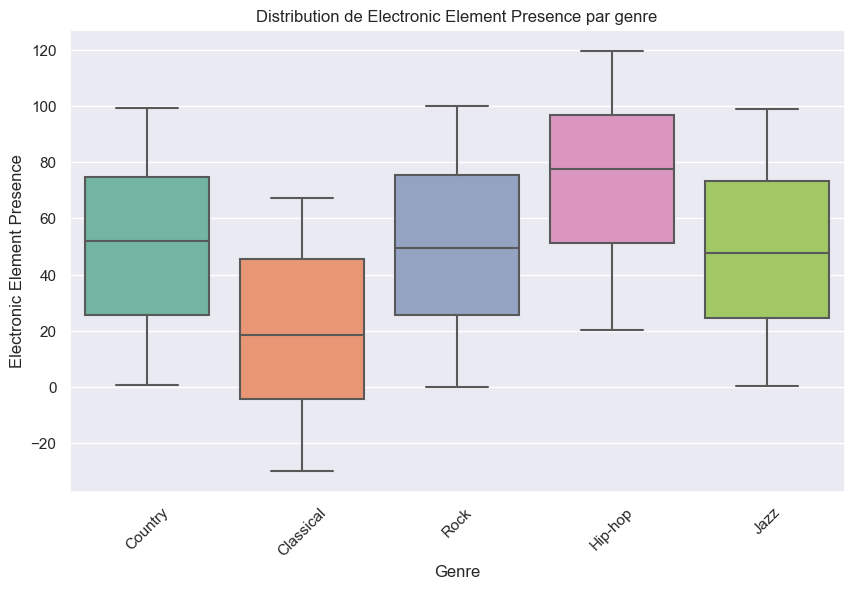

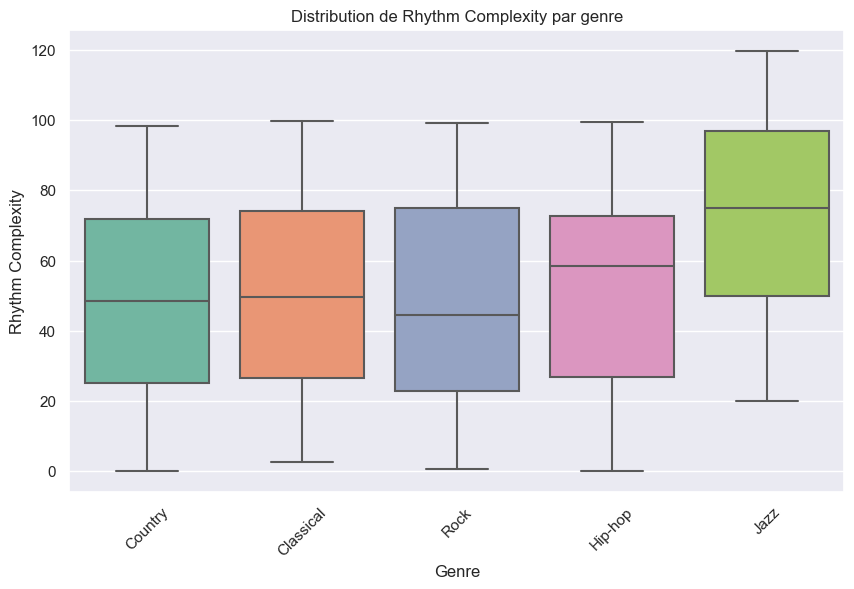

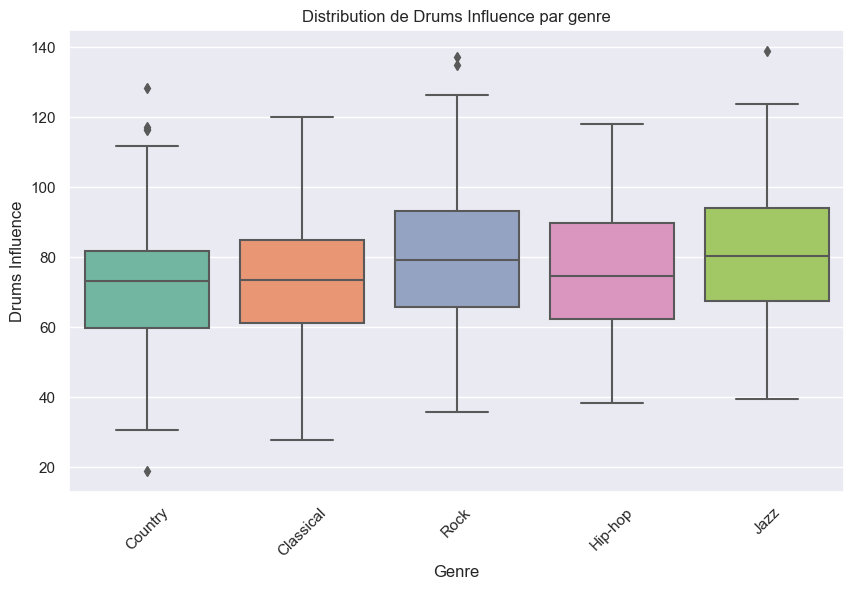

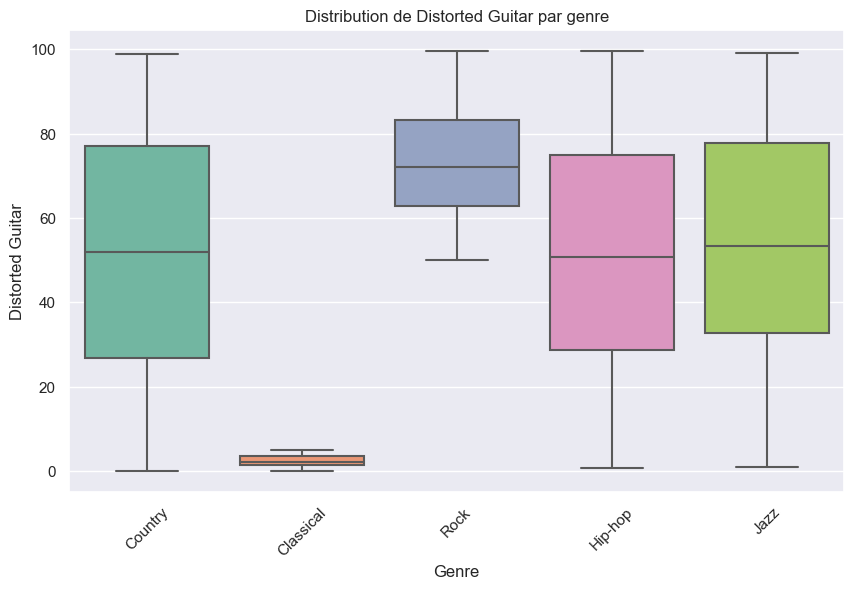

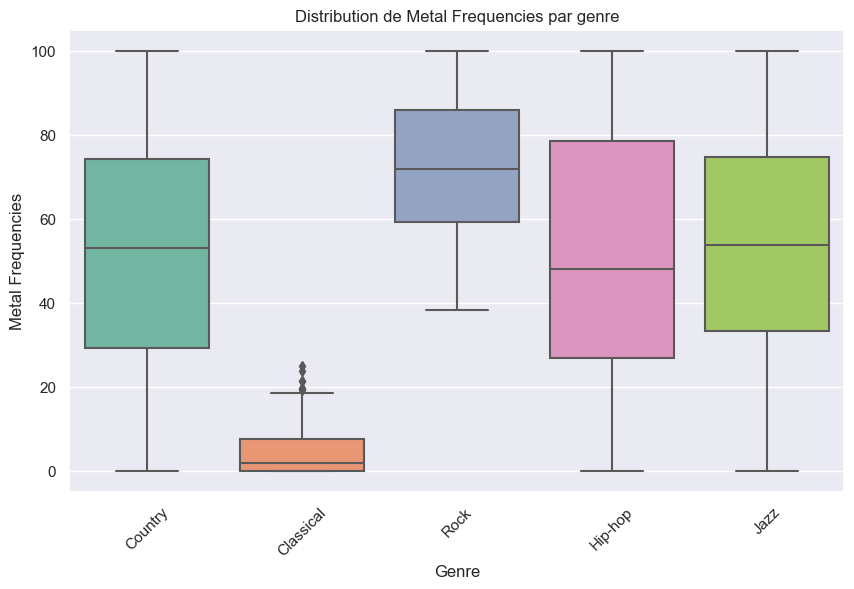

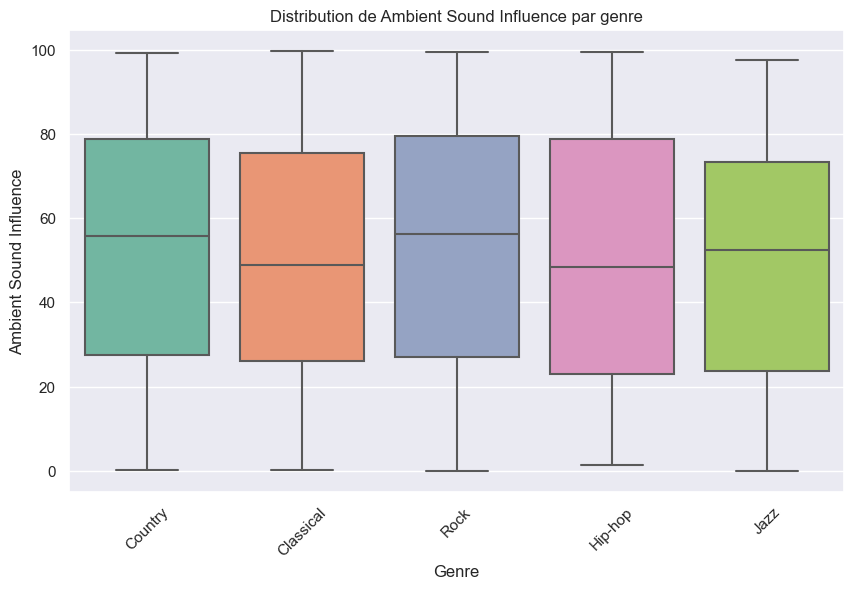

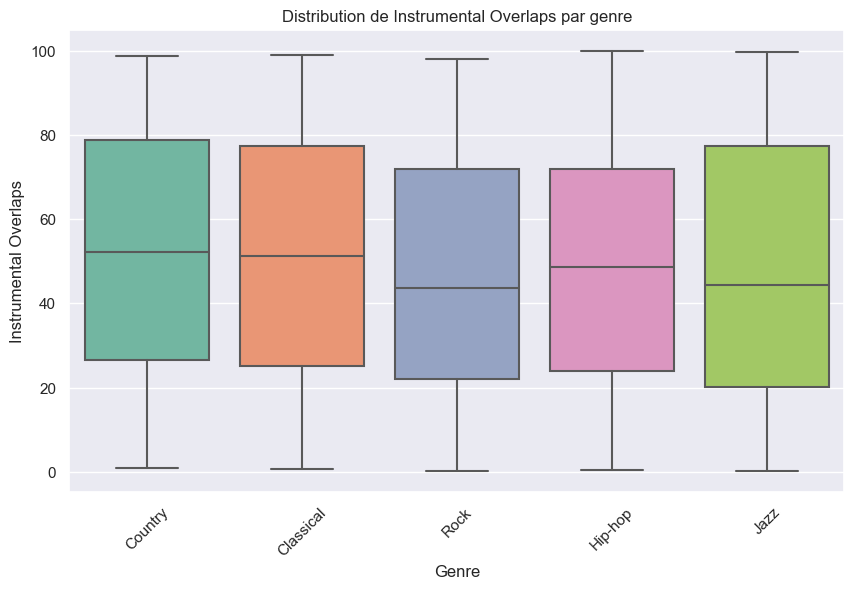

In [58]:
# Exemple de boxplot pour chaque caractéristique par genre
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")
    plt.title(f"Distribution de {feature} par genre")
    plt.xticks(rotation=45)
    plt.show()


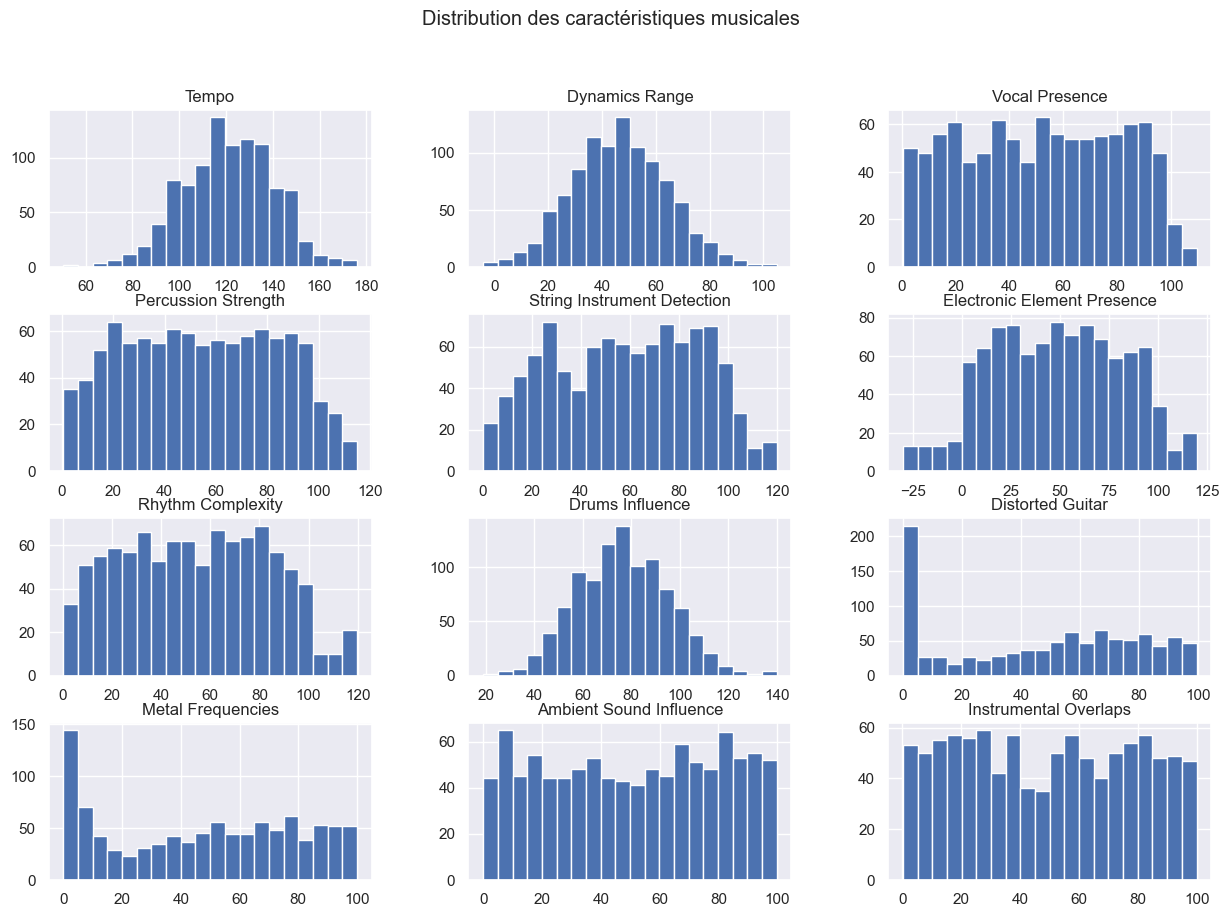

In [59]:

# Visualisation de la distribution de chaque caractéristique
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution des caractéristiques musicales")
plt.show()


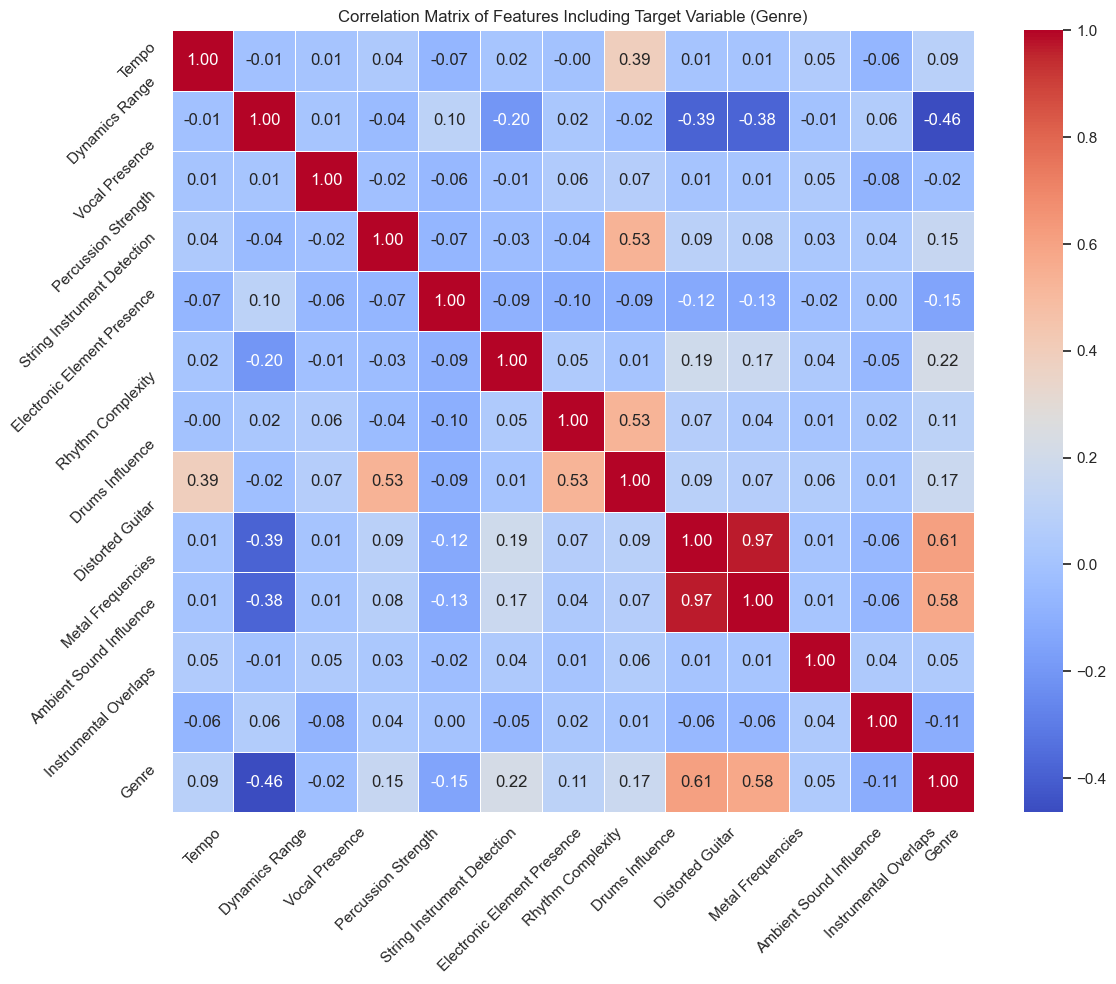

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a copy of the DataFrame
df_corr = df.copy()

# Step 2: Drop rows where 'Genre' is null
df_corr.dropna(subset=['Genre'], inplace=True)

# Step 3: Encode the 'Genre' column (target variable)
label_encoder = LabelEncoder()
df_corr['Genre'] = label_encoder.fit_transform(df_corr['Genre'])

# Step 4: Split the data into features (X) and target (y)
X = df_corr.drop(columns=['Genre'])
y = df_corr['Genre']

# Step 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Concatenate X_train and y_train to prepare for correlation analysis
train_data = X_train.copy()
train_data['Genre'] = y_train

# Step 7: Generate the correlation matrix
correlation_matrix = train_data.corr()

# Step 8: Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features Including Target Variable (Genre)")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


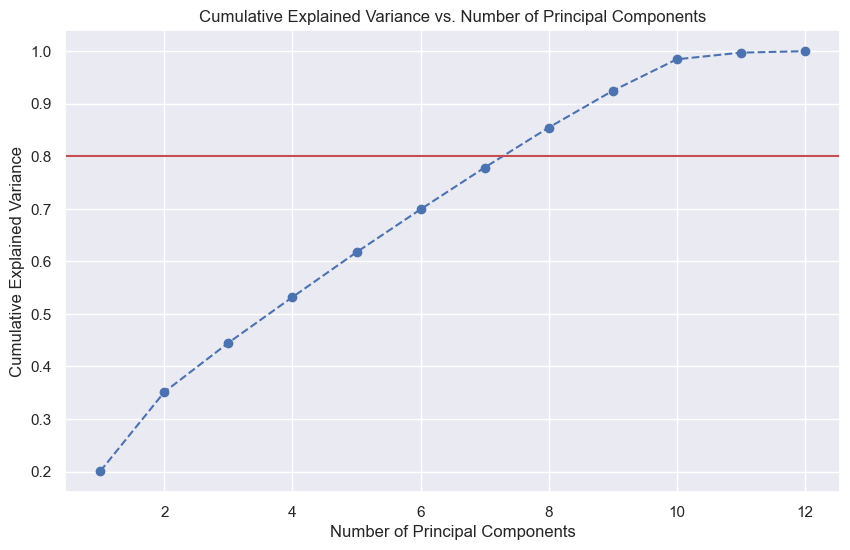

Number of principal components to capture at least 80% of variance: 8


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Standardize the features (excluding 'Genre' column)
features = df_corr.drop(columns=['Genre'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Apply PCA
pca = PCA()
pca.fit(features_scaled)

# Step 3: Analyze explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Step 4: Determine the number of components needed to capture at least 80% variance
num_components = np.argmax(cumulative_variance >= 0.80) + 1

# Step 5: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

print(f"Number of principal components to capture at least 80% of variance: {num_components}")


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Split the data
X = df_corr.drop(columns=['Genre'])
y = df_corr['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA for dimensionality reduction
pca = PCA(n_components=num_components)  # Use num_components from the previous task (e.g., to capture 80% variance)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 4: Train Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression(max_iter=10000, random_state=42)
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)

# Step 5: Train Logistic Regression on original data
log_reg_original = LogisticRegression(max_iter=10000, random_state=42)
log_reg_original.fit(X_train_scaled, y_train)
y_pred_original = log_reg_original.predict(X_test_scaled)

# Step 6: Evaluate the models
# For PCA-transformed data
print("Logistic Regression with PCA-transformed features:")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_pca))

# For original data
print("\nLogistic Regression with original features:")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Classification Report:\n", classification_report(y_test, y_pred_original))

Logistic Regression with PCA-transformed features:
Accuracy: 0.5355805243445693
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.34      0.25      0.29        52
           2       0.48      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.50      0.61      0.55        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267


Logistic Regression with original features:
Accuracy: 0.5280898876404494
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.33      0.25      0.28        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59     

In [64]:
null_avant = df['Genre'].isna().sum()

# Step 1: Separate labeled and unlabeled data
labeled_data = df.dropna(subset=['Genre'])
unlabeled_data = df[df['Genre'].isna()]

# Step 2: Split labeled data into features and target
X_labeled = labeled_data.drop(columns=['Genre'])
y_labeled = labeled_data['Genre']
X_unlabeled = unlabeled_data.drop(columns=['Genre'])

# Step 3: Standardize features
scaler = StandardScaler()
X_labeled_scaled = scaler.fit_transform(X_labeled)
X_unlabeled_scaled = scaler.transform(X_unlabeled)

# Step 4: Apply PCA to the scaled labeled data
pca = PCA(n_components=num_components)  # Replace `n_components` with the number chosen to explain at least 80% of variance
X_labeled_pca = pca.fit_transform(X_labeled_scaled)
X_unlabeled_pca = pca.transform(X_unlabeled_scaled)

# Step 5: Train Logistic Regression on PCA-transformed labeled data
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_labeled_pca, y_labeled)

# Step 6: Predict genres for unlabeled data
predicted_genres = logreg.predict(X_unlabeled_pca)

# Step 7: Fill in missing genres in the original DataFrame
df.loc[df['Genre'].isna(), 'Genre'] = predicted_genres

null_apres = df['Genre'].isna().sum()
print(null_avant)
print(null_apres)


110
0


In [69]:
df.iloc[992,:]

Tempo                          117.892313
Dynamics Range                  35.001524
Vocal Presence                  76.506358
Percussion Strength              77.97257
String Instrument Detection     80.765657
Electronic Element Presence     13.759213
Rhythm Complexity               59.985923
Drums Influence                 80.108786
Distorted Guitar                93.831262
Metal Frequencies                   100.0
Ambient Sound Influence         15.851851
Instrumental Overlaps           47.984445
Genre                                Rock
Name: 992, dtype: object